C&S 4.3 and 5.3 Simultaneous solution of ODE's for PFR reacator with fluid properties a function of temperature

Solving C&S4.3b or C&S5.3a:  $F_T=constant=38.3 mol/s$ with $F_N=38.3-F_{A0}$ so $F_{A0}=10, 20, 30, 35, 38.3 mol/s.$
$$\frac{dF_A}{dV}=r_A$$
$$\frac{dF_B}{dV}=r_B$$
$$\frac{dF_C}{dV}=r_C$$
$$r_A=-kC_A[=]mol/m^3/s$$
$$C_A=\frac{y_AP}{RT}$$
$$lnk=34.34-\frac{34222K}{T}[=]s^{-1}$$

$$\frac{dT}{dV}=\frac{r_A\Delta H_{rxn_i}}{\sum_{n=1}^{4}F_iC_{p_i}}$$
$$∆H_{rxn}=80770+6.8T-298 - 0.00575T^2- 2982-1.27×10^{-6}T^3-2983[=]J/molA$$
$$C_{pA}=26.6+0.183T-45.86\times{10}^{-6}T^2[=]Jmol/K$$
$$C_{pB}=20.04+0.0945T-30.95\times{10}^{-6}T^2$$
$$C_{pC}=13.39+0.077T-18.71\times{10}^{-6}T^2$$
$$C_{pN}=6.25+0.00878T-2.1\times{10}^{-8}T^2$$
The reactor has a volume of $4 m^3$ and the initial values are $T_0=1035K$, $P_0=162kPa$ and $F_{A0}=38.3 mol/s$.


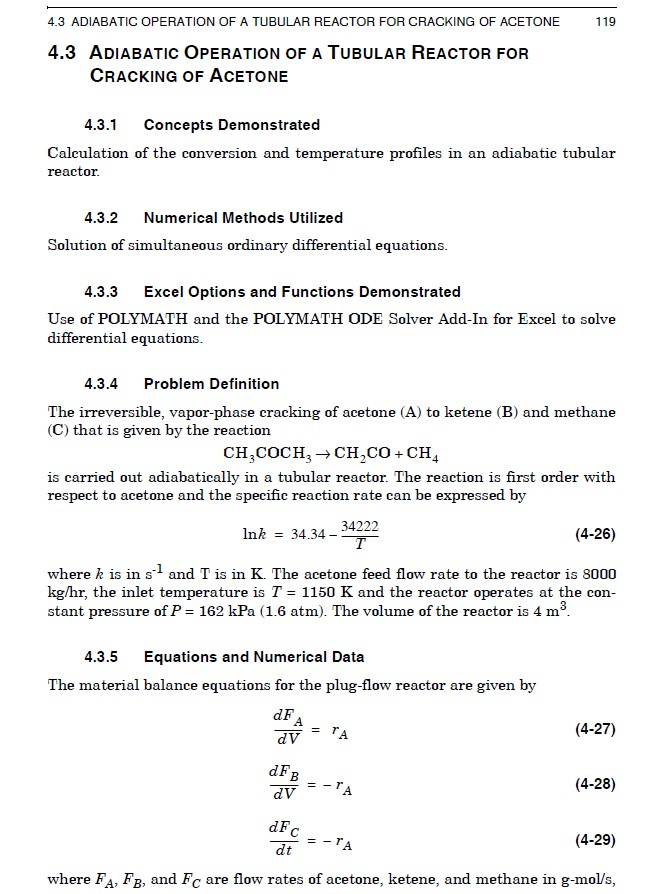

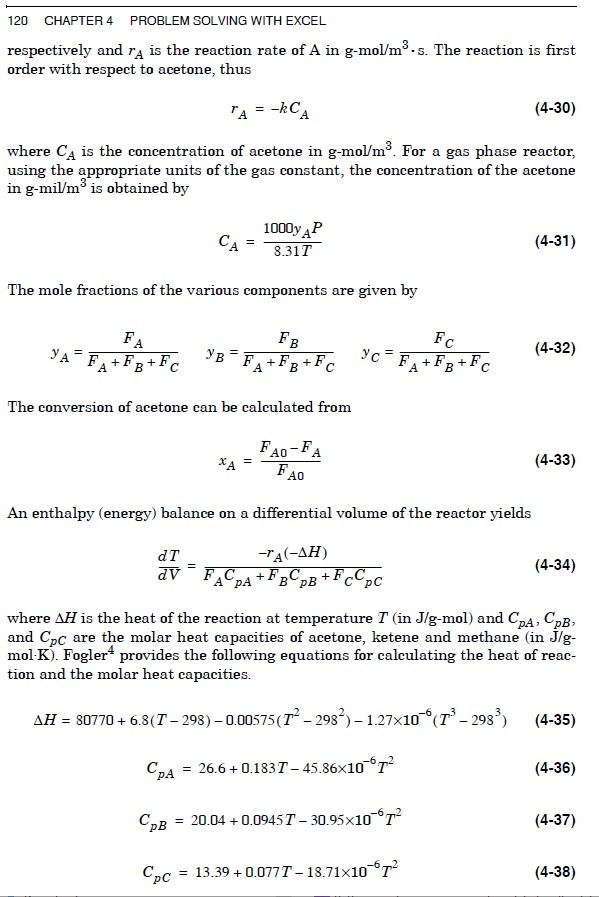

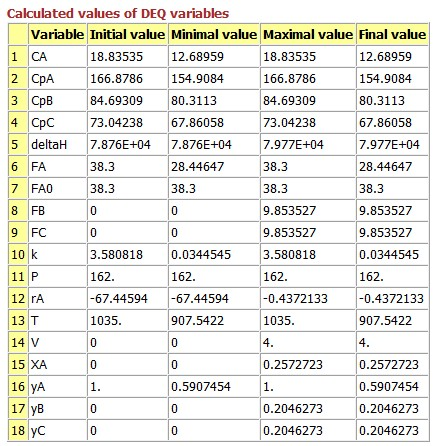

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
#This function is to return the values of the 4 derivatives C&S4.3b and 5.3a
def  ODEfun(V,Yfuncvec):#fun(t,y) and return dy/dt
    FA = Yfuncvec[0]
    FB = Yfuncvec[1]
    FC = Yfuncvec[2]
    T = Yfuncvec[3]

    FA0 = 38.3 #Feed rate of acetone in kg-mol/s 

    k = 820000000000000 * np.exp(-34222 / T) #Reaction rate constant in s-1

    XA = (FA0 - FA) / FA0 #Conversion of acetone 

    FN = 38.3 - FA0 #Feed rate of nitrogen in kg-mol/s 

    P = 162 #Pressure kPa 

    yA = FA / (FA + FB + FC + FN) #Mole fraction of acetone 

    CA = yA * P * 1000 / (8.31 * T) #Concentration of acetone in k-mol/m3 

    yB = FB / (FA + FB + FC + FN) #Mole fraction of ketene 

    yC = FC / (FA + FB + FC + FN) #Mole fraction of methane 

    rA = 0 - (k * CA) #Reaction rate in kg-mole/m3-s
    #Heat of reaction in J/mol-K 
    deltaH = 80770 + 6.8 * (T - 298) - (0.00575 * (T ** 2 - (298 ** 2))) - (0.00000127 * (T ** 3 - (298 ** 3))) 

    CpA = 26.6 + 0.183 * T - (0.00004586 * T ** 2) #Heat capacity of acetone in J/mol-K 

    CpB = 20.04 + 0.0945 * T - (0.00003095 * T ** 2) #Heat capacity of ketene in J/mol-K 

    CpC = 13.39 + 0.077 * T - (0.00001871 * T ** 2) #Heat capacity of methane in J/mol-K

    CpN = 6.25 + 0.00878 * T - (0.000000021 * T ** 2) #Heat capacity of nitrogen in J/mol-K 

    dFAdV = rA #Differential mass balance on acetone 

    dFBdV = 0 - rA #Differential mass balance on ketene

    dFCdV = 0 - rA #Differential mass balance on methane 

    dTdV = (0 - deltaH) * (0 - rA) / (FA * CpA + FB * CpB + FC * CpC + FN * CpN)#Differential enthalpy balance  
    dYfuncvecdV = [dFAdV, dFBdV, dFCdV, dTdV] 
    return dYfuncvecdV 


In [3]:
#test of function dFA/dV=rA etc.
tspan = (0,4.) # Range for the independent variable 
y0 = [10., 0, 0, 1035.] # Initial values for the dependent variables
sol=ODEfun(tspan,y0)
print (sol)

[-67.4459446005474, 67.4459446005474, 67.4459446005474, -3183.1053291160974]


In [4]:
#test of solve function 
tspan = (0,4.) # Range for the independent variable 
y0 = [10., 0, 0, 1035.] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.48259399e-05, 1.63085339e-04, 1.64567933e-03,
       9.83946930e-03, 2.42933919e-02, 5.24744296e-02, 1.05799821e-01,
       2.09513199e-01, 4.11752004e-01, 8.11393070e-01, 1.60651424e+00,
       3.20267582e+00, 4.00000000e+00])
 t_events: None
        y: array([[1.00000000e+01, 9.99900088e+00, 9.98909993e+00, 9.89816866e+00,
        9.55537516e+00, 9.22114172e+00, 8.87269982e+00, 8.53116802e+00,
        8.19373670e+00, 7.86512756e+00, 7.54516561e+00, 7.23515462e+00,
        6.93512316e+00, 6.84078407e+00],
       [0.00000000e+00, 9.99119433e-04, 1.09000653e-02, 1.01831340e-01,
        4.44624836e-01, 7.78858280e-01, 1.12730018e+00, 1.46883198e+00,
        1.80626330e+00, 2.13487244e+00, 2.45483439e+00, 2.76484538e+00,
        3.06487684e+00, 3.15921593e+00],
       [0.00000000e+00, 9.99

In [5]:
print(sol.t)

[0.00000000e+00 1.48259399e-05 1.63085339e-04 1.64567933e-03
 9.83946930e-03 2.42933919e-02 5.24744296e-02 1.05799821e-01
 2.09513199e-01 4.11752004e-01 8.11393070e-01 1.60651424e+00
 3.20267582e+00 4.00000000e+00]


In [6]:
print(sol.y)

[[1.00000000e+01 9.99900088e+00 9.98909993e+00 9.89816866e+00
  9.55537516e+00 9.22114172e+00 8.87269982e+00 8.53116802e+00
  8.19373670e+00 7.86512756e+00 7.54516561e+00 7.23515462e+00
  6.93512316e+00 6.84078407e+00]
 [0.00000000e+00 9.99119433e-04 1.09000653e-02 1.01831340e-01
  4.44624836e-01 7.78858280e-01 1.12730018e+00 1.46883198e+00
  1.80626330e+00 2.13487244e+00 2.45483439e+00 2.76484538e+00
  3.06487684e+00 3.15921593e+00]
 [0.00000000e+00 9.99119433e-04 1.09000653e-02 1.01831340e-01
  4.44624836e-01 7.78858280e-01 1.12730018e+00 1.46883198e+00
  1.80626330e+00 2.13487244e+00 2.45483439e+00 2.76484538e+00
  3.06487684e+00 3.15921593e+00]
 [1.03500000e+03 1.03495285e+03 1.03448547e+03 1.03018527e+03
  1.01384603e+03 9.97716065e+02 9.80684949e+02 9.63771945e+02
  9.46841580e+02 9.30136609e+02 9.13658466e+02 8.97486011e+02
  8.81633928e+02 8.76608482e+02]]


In [7]:
#This prints FA
print(sol.y[0])

[10.          9.99900088  9.98909993  9.89816866  9.55537516  9.22114172
  8.87269982  8.53116802  8.1937367   7.86512756  7.54516561  7.23515462
  6.93512316  6.84078407]


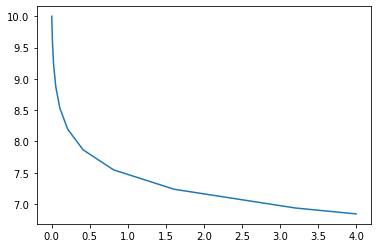

In [8]:
plt.plot(sol.t,sol.y[0])

Text(0, 0.5, 'Temperature (K)')

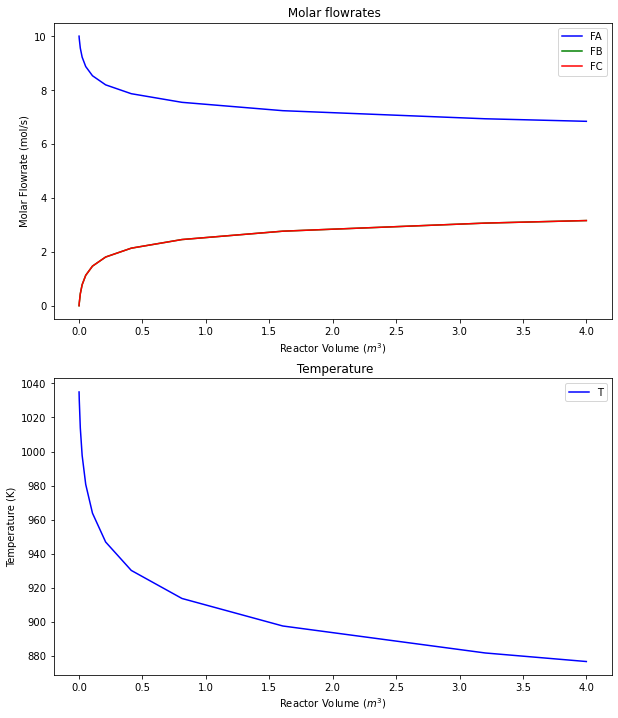

In [10]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'r',label='FC')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate (mol/s)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'b',label='T')

plt.legend()
plt.title(' Temperature')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Temperature (K)')

In [11]:
teval=np.linspace(tspan[0],tspan[1])
print(teval)

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


In [12]:
#test of solve function 
tspan = (0,4.) # Range for the independent variable 
teval=np.linspace(tspan[0],tspan[1],100)
y0 = [10., 0, 0, 1035.] # Initial values for the dependent variables
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242,

Text(0, 0.5, 'Reactor Volume ($m^3$)')

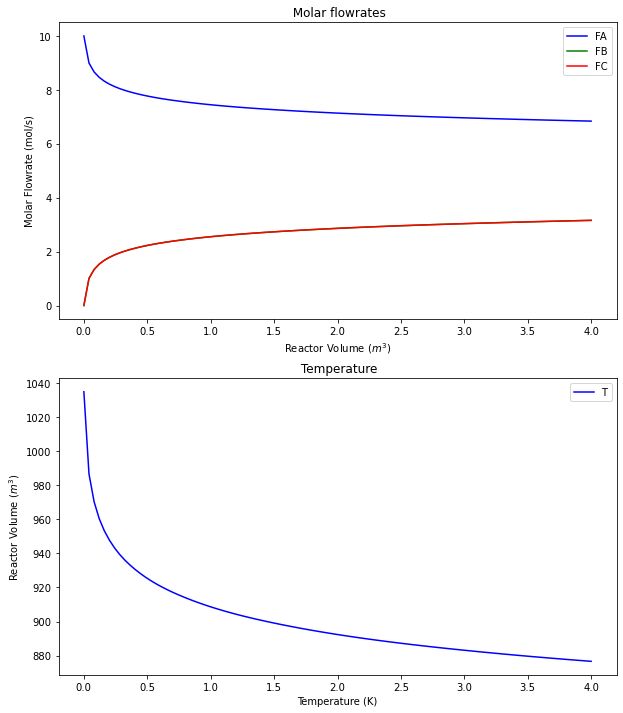

In [13]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'r',label='FC')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Reactor Volume ($m^3$)')
plt.ylabel('Molar Flowrate (mol/s)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'b',label='T')

plt.legend()
plt.title(' Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Reactor Volume ($m^3$)')

In [17]:
#Calculating conversion for C&S5.3a or C&S4.3b
#test of solve function 
tspan = (0,4.) # Range for the independent variable 
y0 = [38.3, 0, 0, 1035.] # Initial values for the dependent variables
teval=np.linspace(tspan[0],tspan[1],100)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)
print('FA0=',sol.y[0,0],'FA_out=',sol.y[0,-1],'T=',sol.y[3,-1])
X=(y0[0]-sol.y[0][-1])/y0[0]
print('X=',X,'T=',sol.y[3][-1])

FA0= 38.3 FA_out= 28.452152308181617 T= 907.6107846543863
X= 0.25712396062188986 T= 907.6107846543863


In [18]:
tspan = (0,4.) # Range for the independent variable 
print(tspan)
print(' V    = ' + str(tspan[0]))

(0, 4.0)
 V    = 0


In [20]:
y0 = [10., 0, 0, 1035.] # Initial values for the dependent variables
print('FA0 = {:.2f} mol/s'.format(y0[0]))
print('FB0 = {:.2f} mol/s'.format(y0[1]))
print('FC0 = {:.2f} mol/s'.format(y0[2]))
print('T = {:.2f} K'.format(y0[3]))


FA0 = 10.00 mol/s
FB0 = 0.00 mol/s
FC0 = 0.00 mol/s
T = 1035.00 K
